In [1]:
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert, VESManager
import numpy as np

In [2]:

a = np.linspace(1, 10, 10)
r = [13.652265433675282, 13.758129233697074, 13.206359444328495, 10.380611731594303, 8.330864788419275, 8.317581072952597, 7.120434768503427, 6.0640275619612956, 5.408241121990998, 5.0616707762341955]

for x in range(0,10):
    k = 2*np.pi*a[x]
    rhoa = r[x]*k

In [3]:
k = 2 * np.pi * a
rhoa = r * k

In [4]:
test = pg.DataContainer();
test["ab2"] = 3*a
test["mn2"] = a
test["rhoa"] = rhoa
test["k"] = k
test["valid"] = 1
test["err"] = ert.estimateError(test, relativeError=0.02, absoluteUError=50e-6)
test.save("test.ves")

1

In [10]:

# mgr = VESManager()
# model = mgr.invert(test["rhoa"], test["err"], ab2=test["ab2"], mn2=test["mn2"], nLayers=4, showProgress=1, verbose=1)
mgr = VESManager(ab2=test["ab2"], mn2=test["mn2"], nLayers=4, )
model = mgr.invert(test["rhoa"], test["err"], verbose=1)

25/10/23 - 09:31:48 - pyGIMLi - INFO - Created startmodel from forward operator: 7, min/max=0.500000/283.266554
25/10/23 - 09:31:48 - pyGIMLi - INFO - Starting inversion.
25/10/23 - 09:31:48 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
25/10/23 - 09:31:48 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
25/10/23 - 09:31:48 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
25/10/23 - 09:31:48 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
25/10/23 - 09:31:48 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.
25/10/23 - 09:31:48 - pyGIMLi - WARNING - Multiprocess Jacobian currently unavailable for Win32 and Mac.


fop: <pygimli.physics.ves.vesModelling.VESModelling object at 0x00000214318E2DB0>
Data transformation: <pgcore._pygimli_.RTransLog object at 0x00000214318EF680>
Model transformation (cumulative):
	 0 <pgcore._pygimli_.RTransLogLU object at 0x00000214318EB040>
	 1 <pgcore._pygimli_.RTransLogLU object at 0x000002142E403AC0>
min/max (data): 85.78/318
min/max (error): 2%/2.01%
min/max (start model): 0.5/283
--------------------------------------------------------------------------------
chi² = 434.76
--------------------------------------------------------------------------------
inv.iter 1 ... chi² = 61.89 (dPhi = 85.76%) lam: 20
--------------------------------------------------------------------------------
inv.iter 2 ... chi² = 20.39 (dPhi = 67.05%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 3 ... chi² = 9.2 (dPhi = 54.89%) lam: 20.0
--------------------------------------------------------------------------------
inv.iter 4 ... c

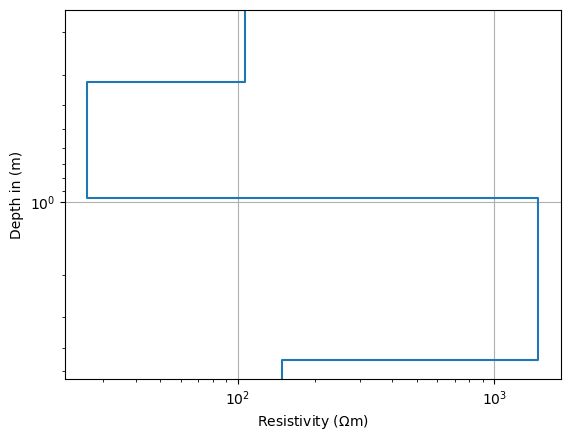

In [11]:
mgr.showResult();

(<Axes: xlabel='Apparent resistivity ($\\Omega$m)', ylabel='AB/2 (m)'>, None)

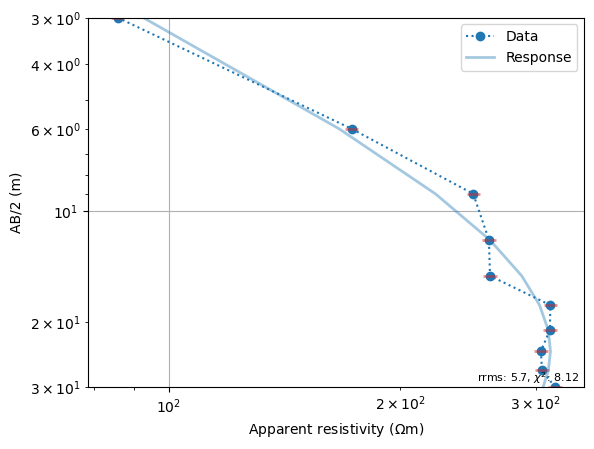

In [12]:
mgr.showFit()